In [109]:
import pandas as pd

data = pd.read_csv('audi.csv')

In [110]:
data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [111]:
data.columns = ['model', 'year', 'price', 'transmission', 'mileage', 'fuelType','tax', 'mpg', 'engineSize',]
data.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [113]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot
from plotly import express as px
from plotly import graph_objects as go


from Custom import (
    Matrix, 
    Summary, 
    All, 
    Knn_Greedy,
)
pyplot.style.use('fivethirtyeight')
pyplot.style.use('dark_background')


In [114]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)

In [115]:
dataset = pd.read_csv('audi.csv')

In [116]:
model_dict = {models: index for index, models in enumerate(dataset["model"].unique())}
fuel_class_dict = {s_class: index for index, s_class in enumerate(dataset["fuelType"].unique())}

dataset_replaced = dataset.copy()
dataset_replaced["model"] = dataset_replaced["model"].replace(model_dict)
dataset_replaced["fuelType"] = dataset_replaced["fuelType"].replace(fuel_class_dict)

In [117]:
dataset_lineer = dataset_replaced.copy()

In [118]:
X = dataset_lineer.drop("model",axis=1)
y = dataset_lineer["model"]

In [119]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=30, random_state=42)

In [120]:
import pandas as pd

data_encoded = pd.get_dummies(data, drop_first=True)

X = data_encoded.drop(columns=['tax'])  
y = data_encoded['tax']


In [121]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Lineer = LinearRegression()

Lineer.fit(X_train, y_train)

y_pred = Lineer.predict(X_test)

print(y_pred)


[ 97.78674132 111.99726513 133.16876801 ...  88.28191488 114.24891722
  70.47340893]


In [122]:
Lineer_score = Lineer.score(X_test, y_test)
Lineer_score

0.5665620043460267

In [123]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train, y_train)
()

()

In [124]:
Ridge_score = ridge.score(X_test, y_test)
Ridge_score

0.568223383569235

In [125]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train, y_train)
()


()

In [126]:
lasso_score = lasso.score(X_test, y_test)
lasso_score

0.47724279992969243

In [127]:
from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)

()

()

In [128]:
LogisticRegression_Score = logistic_regression.score(X_test, y_test)
LogisticRegression_Score

0.5346766635426429

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
          20       0.03      0.18      0.06        22
          30       0.48      0.23      0.31       496
         115       0.00      0.00      0.00         0
         125       0.00      0.00      0.00         0
         135       0.00      0.00      0.00         0
         145       0.94      0.64      0.76      1592
         150       0.00      0.00      0.00         3
         160       0.00      0.00      0.00         0
         165       0.00      0.00      0.00         0
         195       0.00      0.00      0.00         0
         200       0.05      0.21      0.08        14
         205       0.00      0.00      0.00         0
         220       0.00      0.00      0.00         0
         235       0.00      0.00      0.00         0
         240       0.00      0.00      0.00         0
         260       0.00      0.00

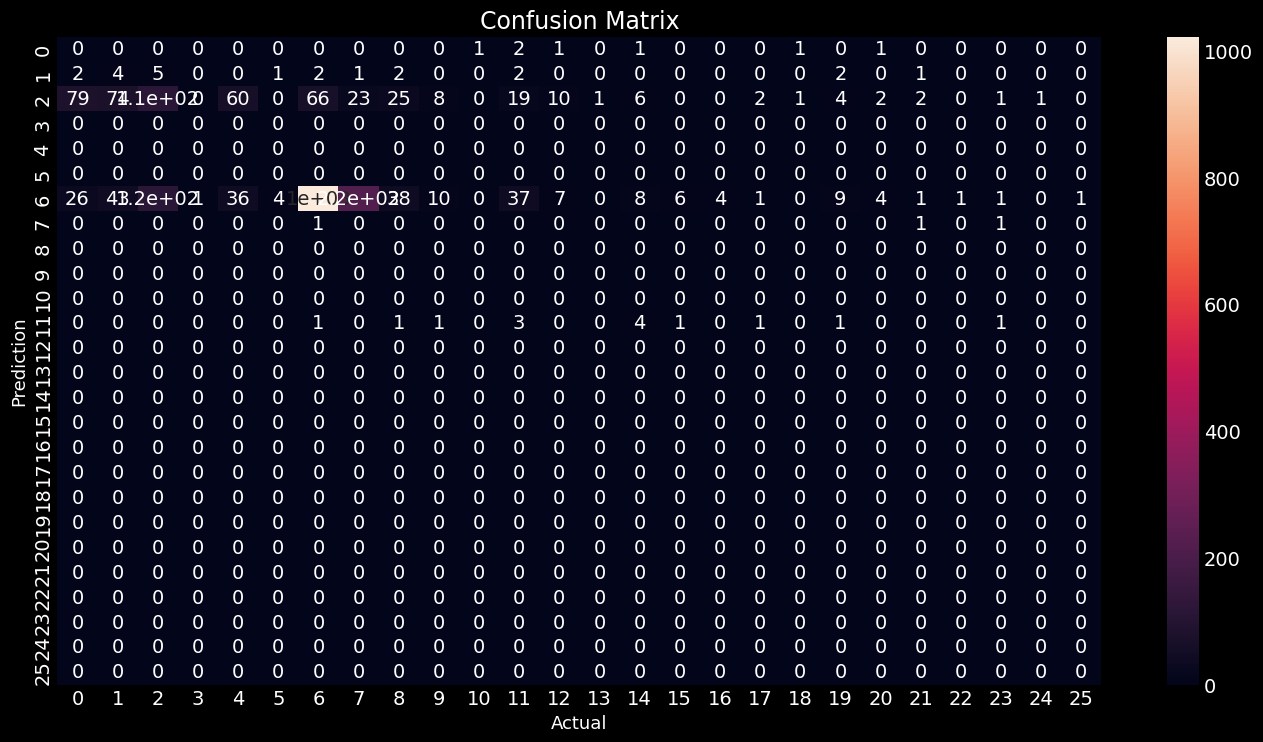

In [129]:
All("Logistic Regression", logistic_regression.predict(X_test), y_test)


In [130]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
KNeighborsClassifier_Score = knn.score(X_test, y_test)
KNeighborsClassifier_Score

0.5182755388940956

Classification Report for KNNeighbors:
               precision    recall  f1-score   support

           0       0.34      0.48      0.40       107
          20       0.18      0.22      0.20       121
          30       0.25      0.34      0.29       232
         115       0.00      0.00      0.00         1
         125       0.10      0.06      0.08        96
         135       0.00      0.00      0.00         5
         145       0.71      0.84      0.77      1092
         150       0.22      0.07      0.11       241
         160       0.07      0.02      0.03        66
         165       0.00      0.00      0.00        19
         195       0.00      0.00      0.00         1
         200       0.20      0.14      0.17        63
         205       0.00      0.00      0.00        18
         220       0.00      0.00      0.00         1
         235       0.20      0.11      0.14        19
         240       0.00      0.00      0.00         7
         260       0.00      0.00      0.

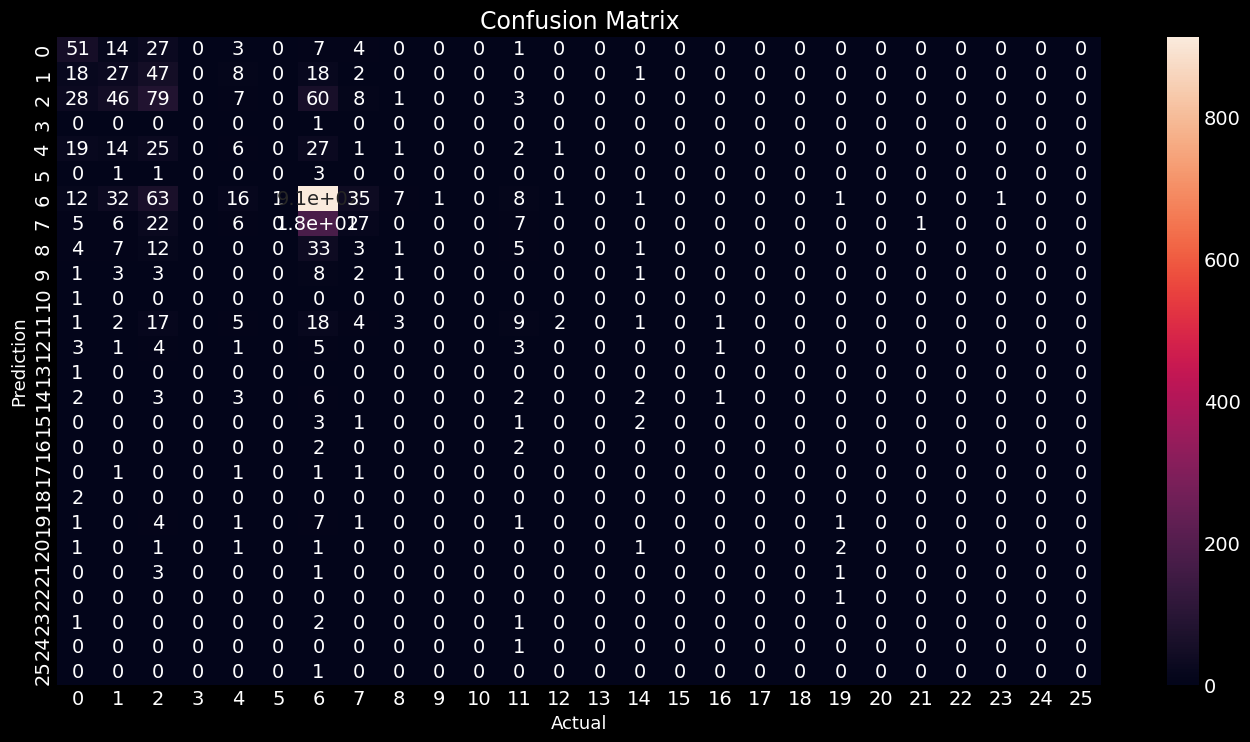

In [133]:
All("KNNeighbors", y_test, y_pred_knn)

In [134]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)
svm_score = svm.score(X_test, y_test)
svm_predict = svm.predict(X_test)
svm_score

0.549203373945642

Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.42      0.07      0.13       107
          20       0.00      0.00      0.00       121
          30       0.26      0.69      0.37       232
         115       0.00      0.00      0.00         1
         125       0.00      0.00      0.00        96
         135       0.00      0.00      0.00         5
         145       0.68      0.92      0.78      1092
         150       0.00      0.00      0.00       241
         160       0.00      0.00      0.00        66
         165       0.00      0.00      0.00        19
         195       0.00      0.00      0.00         1
         200       0.00      0.00      0.00        63
         205       0.00      0.00      0.00        18
         220       0.00      0.00      0.00         1
         235       0.00      0.00      0.00        19
         240       0.00      0.00      0.00         7
         260       0.00      0.00      0.00      

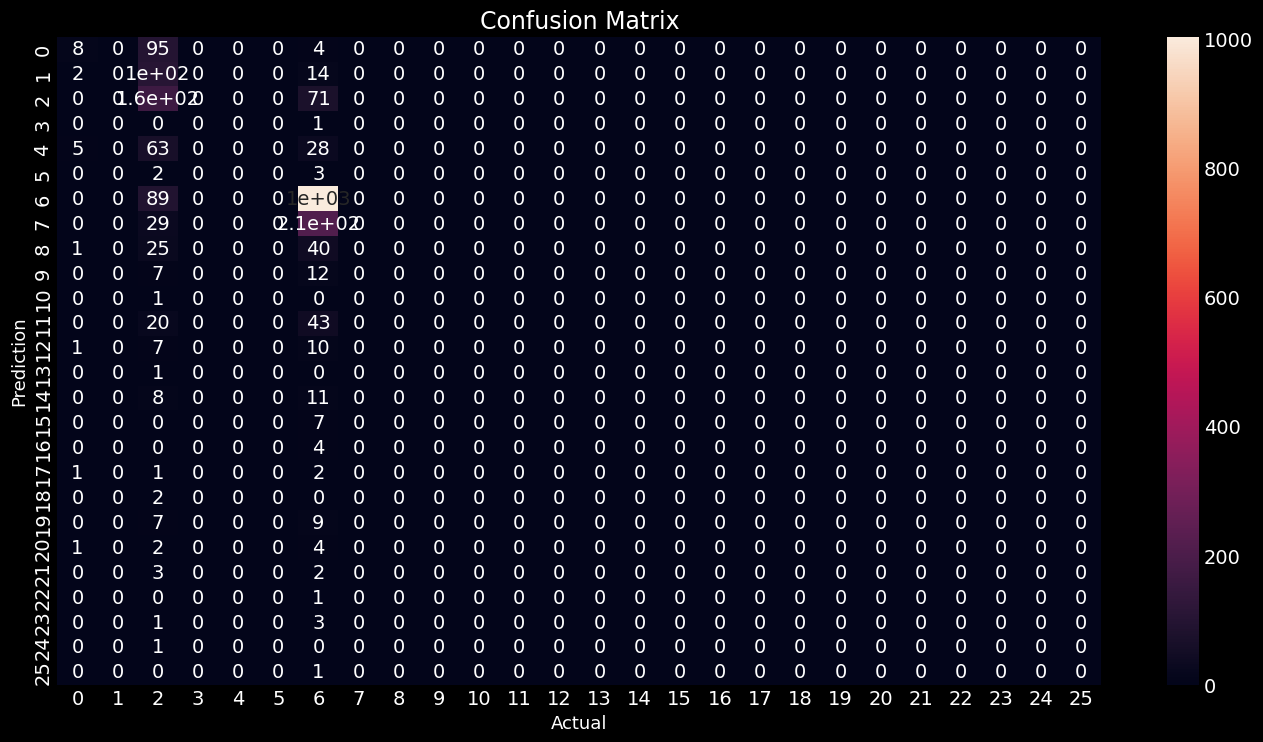

In [135]:
All("SVM", y_test, svm_predict)

In [136]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(criterion="entropy")
decision_tree.fit(X_train, y_train)
y_pred_dt = decision_tree.predict(X_test)
decision_tree_accuracy = decision_tree.score(X_test, y_test)


Classification Report for Decision Tree Classifier:
               precision    recall  f1-score   support

           0       0.92      0.91      0.92       107
          20       0.83      0.83      0.83       121
          30       0.86      0.86      0.86       232
         115       0.00      0.00      0.00         1
         125       0.80      0.81      0.80        96
         135       1.00      0.40      0.57         5
         140       0.00      0.00      0.00         0
         145       0.82      0.81      0.82      1092
         150       0.30      0.31      0.30       241
         155       0.00      0.00      0.00         0
         160       0.70      0.68      0.69        66
         165       0.00      0.00      0.00        19
         195       0.00      0.00      0.00         1
         200       0.73      0.75      0.74        63
         205       0.13      0.11      0.12        18
         220       0.00      0.00      0.00         1
         235       0.59     

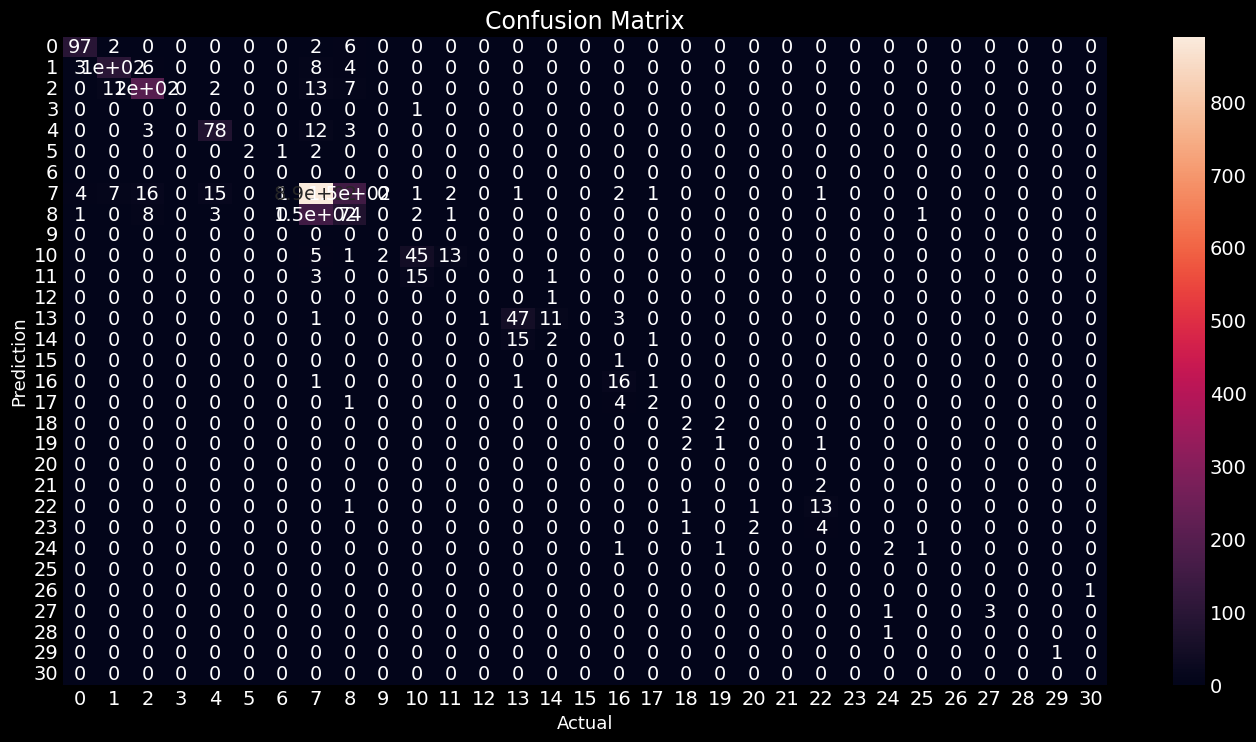

In [137]:
All("Decision Tree Classifier", y_test, y_pred_dt)


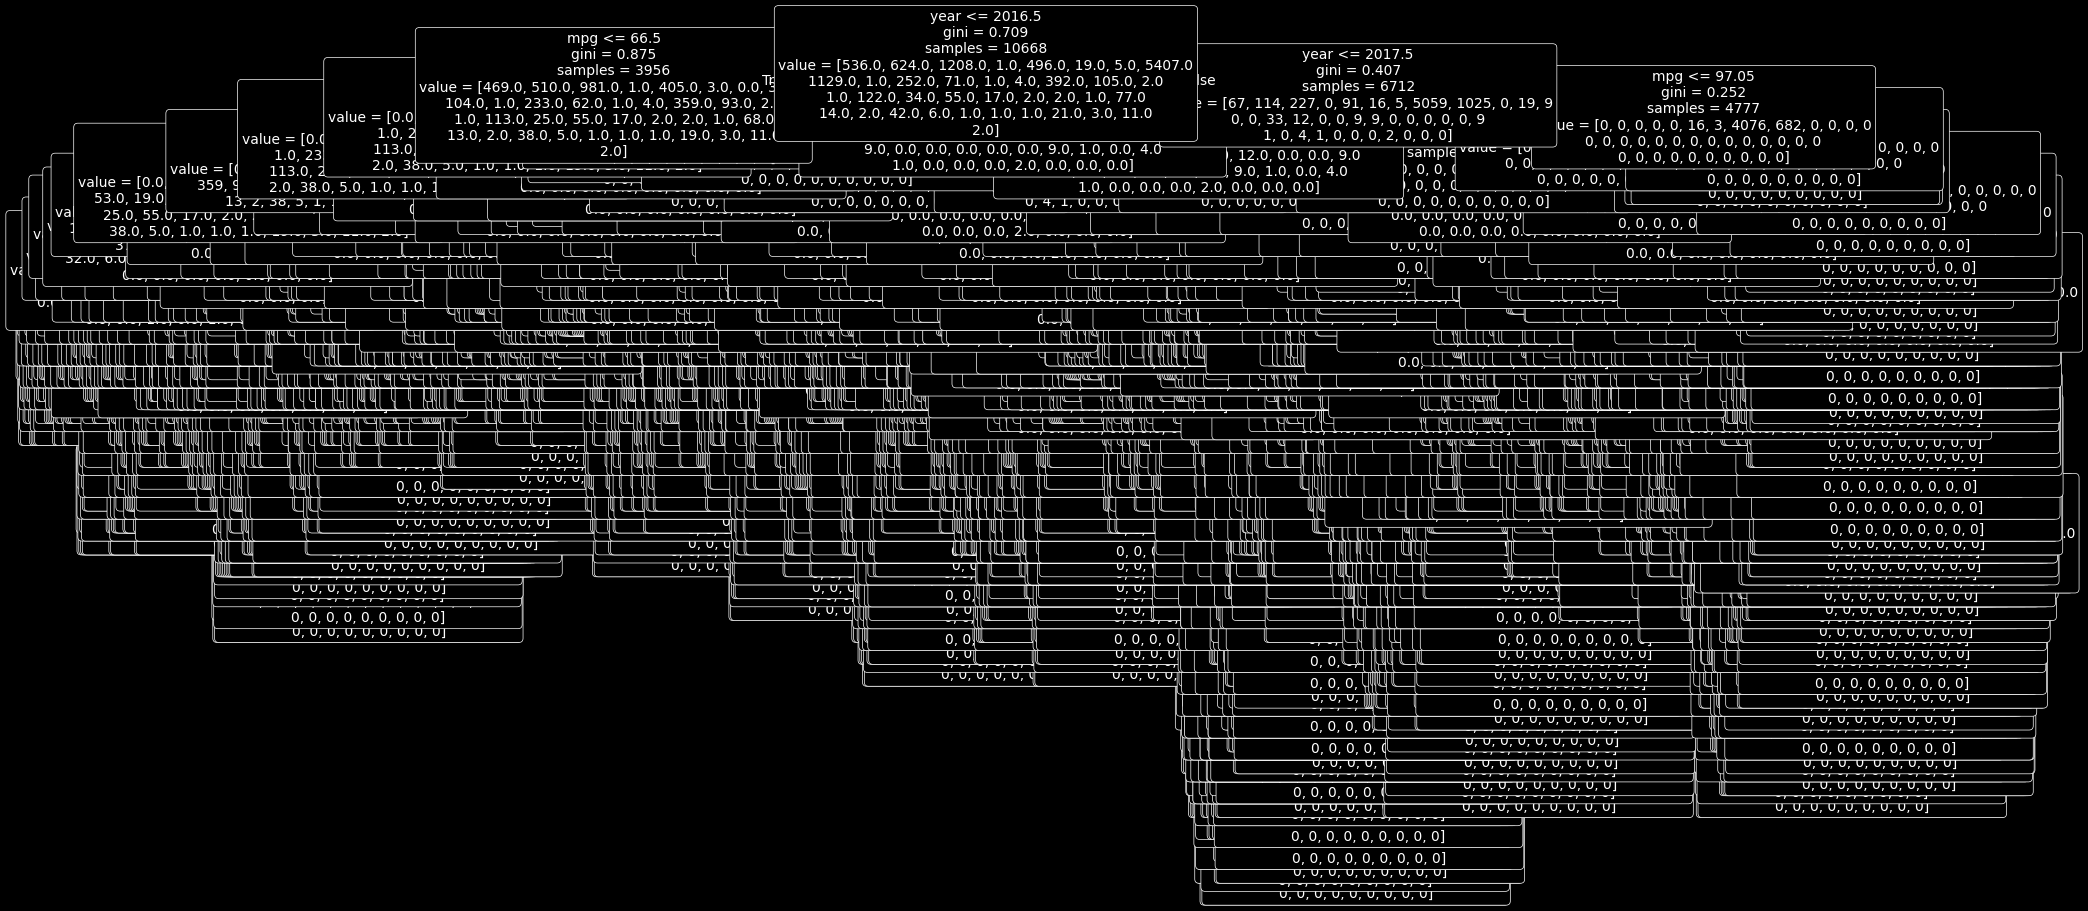

In [139]:
from sklearn import tree
import matplotlib.pyplot as pyplot

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X, y)

fig = pyplot.figure(figsize=(20,10))
tree.plot_tree(decision_tree, 
               feature_names=X.columns, 
               fontsize=10, 
               rounded=True)
pyplot.show()



In [140]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
random_forest_score = random_forest.score(X_test, y_test)
random_forest_predict = random_forest.predict(X_test)
random_forest_score


0.7731958762886598

Classification Report for Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       107
          20       0.88      0.84      0.86       121
          30       0.90      0.87      0.88       232
         115       0.00      0.00      0.00         1
         125       0.87      0.82      0.84        96
         135       1.00      0.60      0.75         5
         145       0.80      0.91      0.85      1092
         150       0.30      0.14      0.19       241
         160       0.68      0.71      0.70        66
         165       0.00      0.00      0.00        19
         195       0.00      0.00      0.00         1
         200       0.69      0.81      0.74        63
         205       0.50      0.11      0.18        18
         220       0.00      0.00      0.00         1
         235       0.48      0.53      0.50        19
         240       0.22      0.29      0.25         7
         260       0.30     

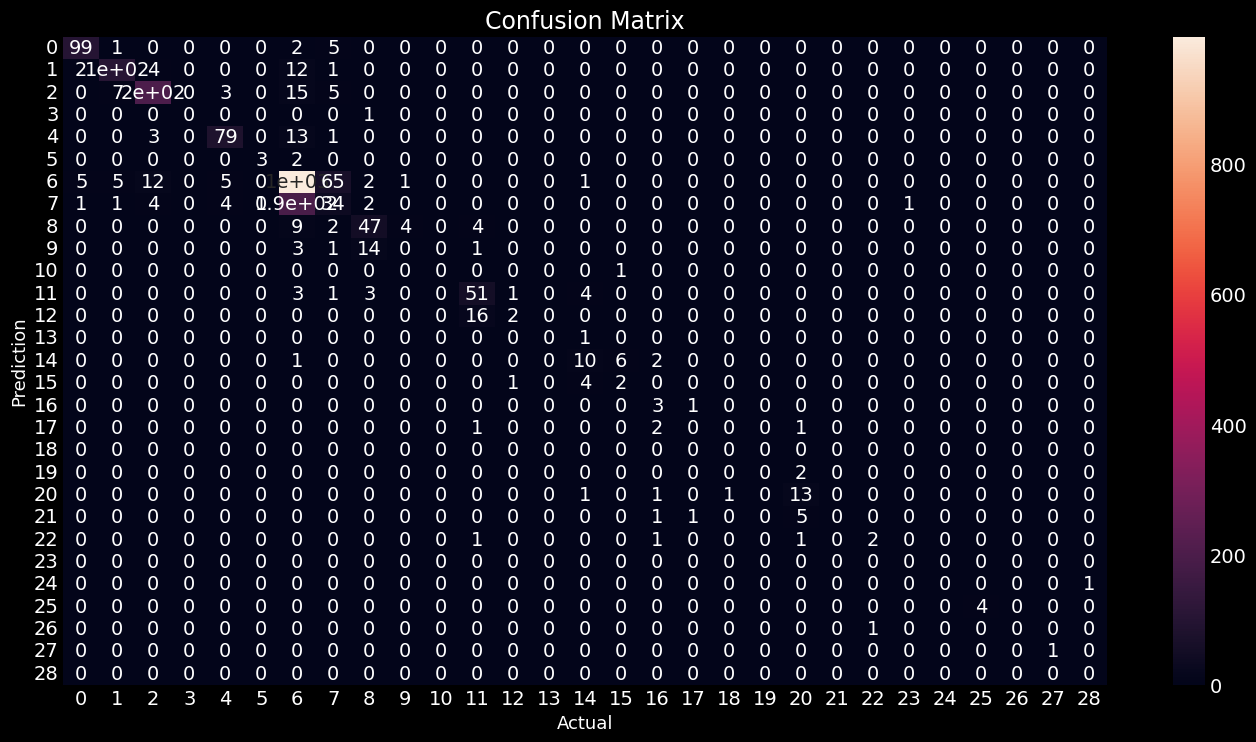

In [141]:
All("Random Forest Classifier", y_test, random_forest_predict)


In [142]:
scores = [Lineer_score, Ridge_score, lasso_score, LogisticRegression_Score, KNeighborsClassifier_Score, svm_score, decision_tree_accuracy, random_forest_score]
best_model_index = scores.index(max(scores))
best_model_name = ['Linear Regression', 'Ridge', 'Lasso', 'Logistic Regression', 'KNeighbors Classifier', 'SVM', 'Decision Tree', 'Random Forest'][best_model_index]
print(f"The best model is {best_model_name} with a score of {max(scores)}")

The best model is Random Forest with a score of 0.7731958762886598
